# Fandango Analysis
1. data

    the datasets contain movie ratings. one contains data before the journalist Walt Hickey found out that fandango's data might be biased. and the other contains data after that event.


2. goal

    analyze the data and get some interesting informations. still any bias?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

## read in files

In [2]:
fandango_score_comparison = pd.read_csv("fandango_score_comparison.csv")
movie_ratings_16_17 = pd.read_csv("movie_ratings_16_17.csv")

## short exploration

In [3]:
fandango_score_comparison.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
fandango_score_comparison.tail()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
141,Mr. Holmes (2015),87,78,67,7.9,7.4,4.0,4.0,4.35,3.90,...,3.70,4.5,4.0,3.5,4.0,3.5,33,7367,1348,0.0
142,'71 (2015),97,82,83,7.5,7.2,3.5,3.5,4.85,4.10,...,3.60,5.0,4.0,4.0,4.0,3.5,60,24116,192,0.0
143,"Two Days, One Night (2014)",97,78,89,8.8,7.4,3.5,3.5,4.85,3.90,...,3.70,5.0,4.0,4.5,4.5,3.5,123,24345,118,0.0
144,Gett: The Trial of Viviane Amsalem (2015),100,81,90,7.3,7.8,3.5,3.5,5.00,4.05,...,3.90,5.0,4.0,4.5,3.5,4.0,19,1955,59,0.0
145,"Kumiko, The Treasure Hunter (2015)",87,63,68,6.4,6.7,3.5,3.5,4.35,3.15,...,3.35,4.5,3.0,3.5,3.0,3.5,19,5289,41,0.0


In [5]:
fandango_score_comparison.shape

(146, 22)

In [6]:
movie_ratings_16_17.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [7]:
movie_ratings_16_17.shape

(214, 15)

In [8]:
fandango_before = fandango_score_comparison[['FILM', 'Fandango_Stars', 'Fandango_Ratingvalue', 'Fandango_votes', 'Fandango_Difference']].copy()
fandango_after = movie_ratings_16_17[['movie', 'year', 'fandango']].copy()

In [9]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

## population
the problem with the two datasets is, that fandango_before contains movies with ticket sales in 2015. also it contains only movies with 30 or more reviews. 
the fandango_after dataset contains movies released in 2016 and later. they also have a couple of votes and reviews.

so it will not be possible to compare the ratings of the same movie and how they possibly changed after Hickeys article. 

but both datasets seem to represent movies with many reviews so a population to compare might be the ratings of "popular" films in 2015 and 2016 or later. popular, for this case, is defined as movies with 30 reviews or more.

In [10]:
fandango_before[fandango_before['Fandango_votes'] < 30].shape

(0, 5)

In [11]:
sample_10 = fandango_after.sample(10, random_state=1)

In [12]:
sample_10

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


## notes
the dataset fandango_before contains no movies with less then 30 reviews.

as the dataset fandango_after has no information on the number of reviews i picked 10 random movies and looked them up on fandango.com:

Mechanic: Resurrection 2.249 fan ratings
Warcraft: 7.279 fan ratings
Max Steel: 493 fan ratings
Me Before You: 5.269 fan ratings
Fantastic Beasts and Where to Find Them: page not available
Cell: 18 fan ratings
Genius: 127 fan ratings
Sully: 11.887 fan ratings
A Hologram for the King: 501 fan ratings
Captain America: Civil War: 35.128 fan ratings

only one movie has lass then 30 reviews. so it is possible to compare the two datasets in terms of popular movies, by the definition of Walt Hickey.

In [13]:
fandango_before['year'] = fandango_before['FILM'].str[-5:-1]
fandango_before.head()

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference,year
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5,2015
1,Cinderella (2015),5.0,4.5,12640,0.5,2015
2,Ant-Man (2015),5.0,4.5,12055,0.5,2015
3,Do You Believe? (2015),5.0,4.5,1793,0.5,2015
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5,2015


In [14]:
fandango_2015 = fandango_before[fandango_before['year'] == "2015"]

In [15]:
fandango_2015['year'].value_counts()

2015    129
Name: year, dtype: int64

In [16]:
fandango_after['year'].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [17]:
fandango_2016 = fandango_after[fandango_after['year'] == 2016]

In [18]:
fandango_2016["year"].value_counts()

2016    191
Name: year, dtype: int64

# comparing the datasets

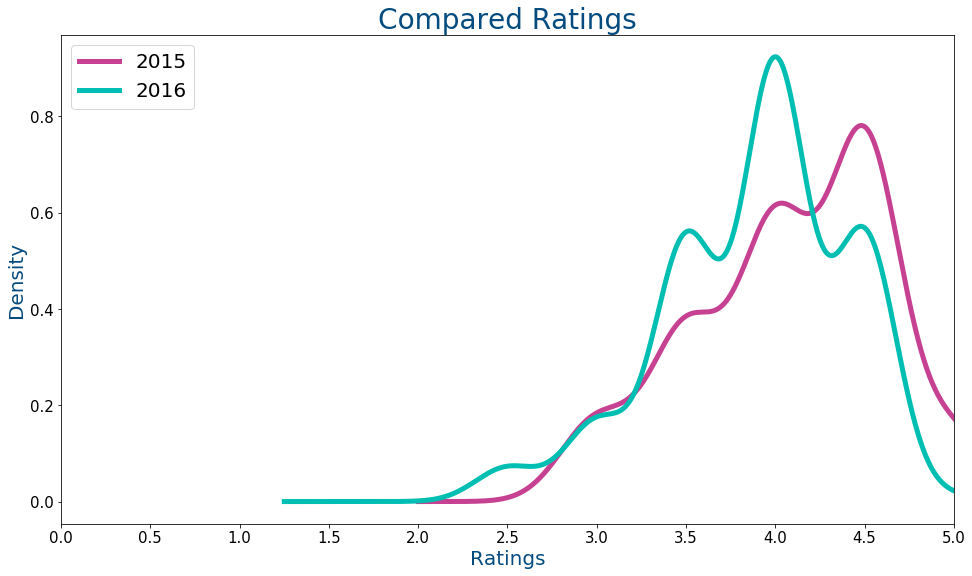

In [19]:
ticks = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0]
fandango_2015['Fandango_Stars'].plot.kde(label = "2015", legend = True, color="#C64191", figsize=(16,9), linewidth=5)
fandango_2016['fandango'].plot.kde(label = "2016", legend = True, color="#00BFB2", linewidth=5)
plt.title("Compared Ratings", fontsize=28, color="#044B7F")
plt.xlabel("Ratings", color="#044B7F", fontsize=20)
plt.xlim(0,5)
plt.xticks(ticks, fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel("Density", color="#044B7F", fontsize=20)
plt.legend(loc='upper left', fontsize=20)

## notes
there is a clear difference between the two distributions. the movies in 2016 have lower ratings. there is a peak on 4.0 ratings while in 2015 the peak was at 4.5. Hickey found out that in 2015 fandango rounded up the user ratings. fandango said this was due to a bug on the website and they fixed it. also there were nearly no ratings under 3.0 which in 2016 obviously changed too. the probabilty of a 5.0 rating decreased in 2016.

so it seems the rataings truely changed.

here is the link to the story of Walt Hickey:
https://fivethirtyeight.com/features/fandango-movies-ratings/

## frequeny distribution using bar plots
1. in relation by the number of users
2. in percentages
3. statistics on mean, median, mode

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

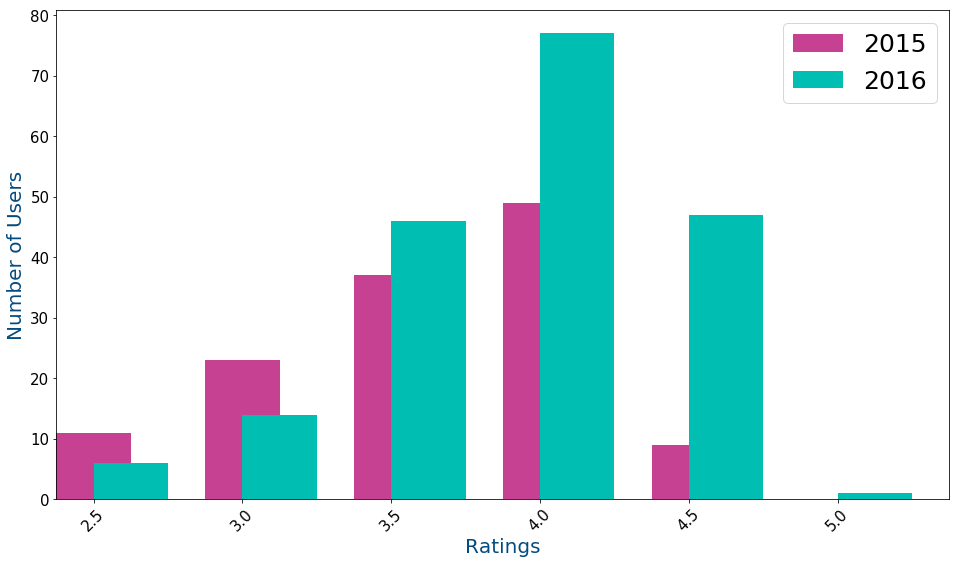

In [20]:
fandango_2015["Fandango_Stars"].value_counts().sort_index().plot.bar(label = "2015", legend = True, color="#C64191", align = 'center', figsize=(16,9))
fandango_2016["fandango"].value_counts().sort_index().plot.bar(label = "2016", legend = True, color="#00BFB2", align = 'edge')
plt.legend(fontsize=25)
plt.xlabel("Ratings", color="#044B7F", fontsize=20)
plt.ylabel("Number of Users", color="#044B7F", fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=45)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

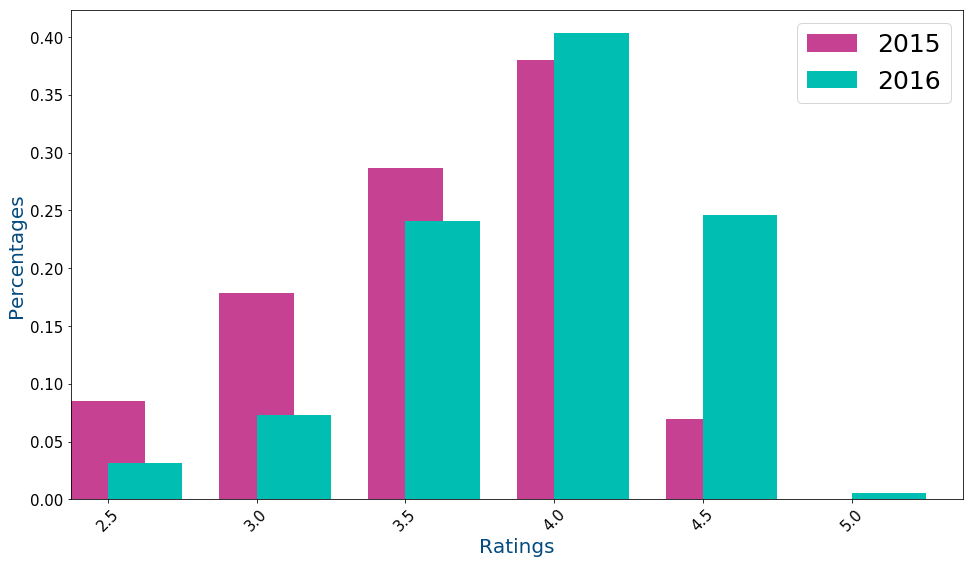

In [21]:
fandango_2015["Fandango_Stars"].value_counts(normalize = True).sort_index().plot.bar(label = "2015", legend = True, color="#C64191", align = 'center', figsize=(16,9))
fandango_2016["fandango"].value_counts(normalize = True).sort_index().plot.bar(label = "2016", legend = True, color="#00BFB2", align = 'edge')
plt.legend(fontsize=25)
plt.xlabel("Ratings", color="#044B7F", fontsize=20)
plt.ylabel("Percentages", color="#044B7F", fontsize=20)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=45)

In [22]:
mean_2015 = fandango_2015["Fandango_Stars"].mean()
mean_2016 = fandango_2016["fandango"].mean()
median_2015 = fandango_2015["Fandango_Stars"].median()
median_2016 = fandango_2016["fandango"].median()
mode_2015 = fandango_2015["Fandango_Stars"].mode()[0]
mode_2016 = fandango_2016["fandango"].mode()[0]
d = {'2015': [mean_2015, median_2015, mode_2015], '2016': [mean_2016, median_2016, mode_2016]}
statistics = pd.DataFrame(data=d)
statistics.index = ['mean', 'median', 'mode']
statistics

,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


Text(0.5,1,'Statistics 2015 and 2016')

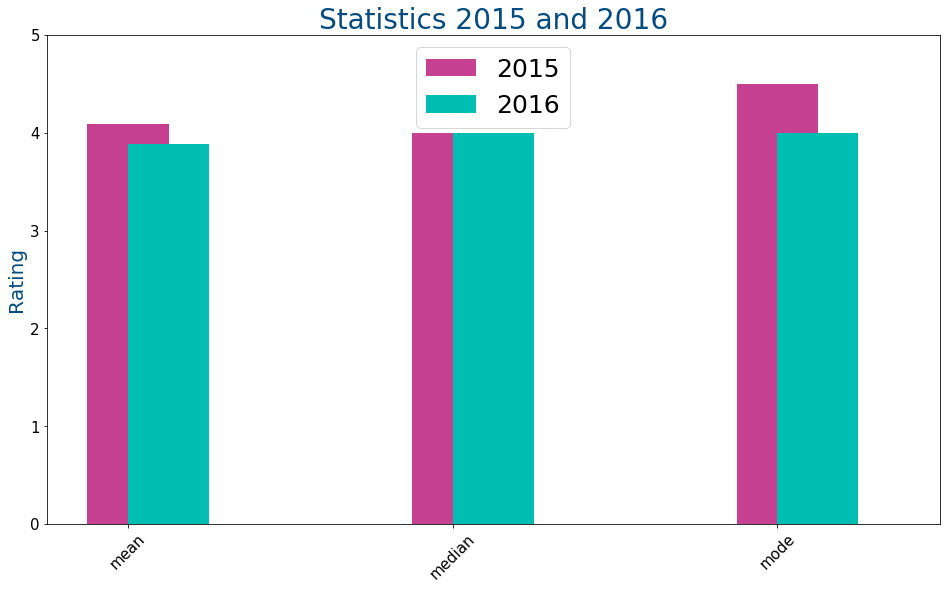

In [23]:
statistics["2015"].plot.bar(label = "2015", legend = True, align="center", figsize=(16,9), color="#C64191", width=.25)
statistics["2016"].plot.bar(label = "2016", legend = True, align="edge", color="#00BFB2", width=.25)
plt.ylabel("Rating", color="#044B7F", fontsize=20)
plt.ylim(0,5)
plt.legend(loc="upper center", fontsize=25)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15, rotation=45)
plt.title("Statistics 2015 and 2016", fontsize=28, color="#044B7F")

# conclusion
there is a change in the movie ratings. the mean in 2016 is lower than it was in 2015. also the mode value in 2016 is 4.0 instead of 4.5 in 2015.

the reason for the changes is not sure, but there seems to be c chance that these are caused by the article of Walter Hickey.